In [1]:
import markov_sim as markov
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   0-0  0-1  1-0  1-1  2-0  0-2  2-1  1-2  2-2  3-0  0-3  3-1       1-3  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.942486   

        3-2       2-3   V1   V2    r1_win    r2_win  
0  0.003308  0.054206  0.0  0.0  0.003308  0.996692  


In [2]:
p1serve = np.linspace(0.0, 1.29, 1291)
p2serve = np.linspace(1.29, 0.0, 1291)
tot = p1serve + p2serve
print(p1serve, p2serve)

[0.000e+00 1.000e-03 2.000e-03 ... 1.288e+00 1.289e+00 1.290e+00] [1.290e+00 1.289e+00 1.288e+00 ... 2.000e-03 1.000e-03 0.000e+00]


In [3]:
markov_arr = np.empty(p1serve.shape)
mis, sis, gis, tbis = markov.initiate_markov_states()
idx = 0
for p1, p2 in zip(p1serve, p2serve):
    mis, sis, gis, tbis = markov.initiate_markov_states()
    markov_arr[idx] = markov.tennis_model(p1, p2, '0-0', '0-0', mis, sis, gis, tbis)['r1_win'].values
    idx = idx + 1

In [4]:
print(markov_arr)

[0.00000000e+00 4.42111938e-33 1.92941061e-32 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


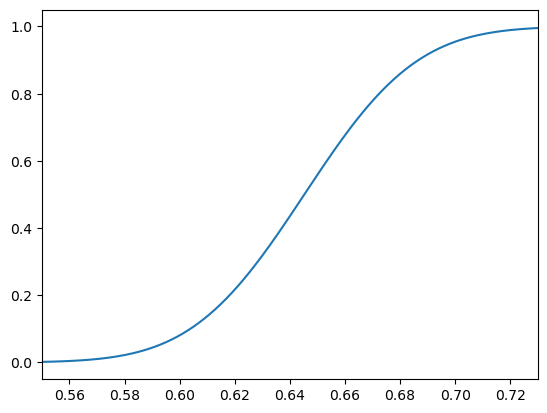

In [7]:
plt.plot(p1serve, markov_arr)
plt.xlim([0.55, 0.73])
plt.show()

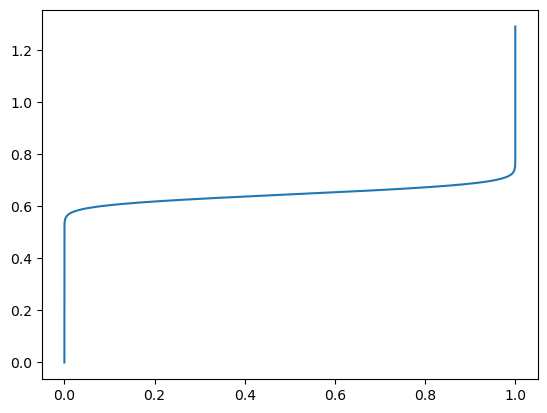

In [12]:
df = pd.DataFrame({'Serve percentage': p1serve}, index=markov_arr)
plt.plot(df)
df.to_csv('markov_serve_prob.csv')